In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

c:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# importing the training dataset
df1 = pd.read_csv("D:/MSc Part-2/SEMESTER 4/CodSoft Internship 2/Genre Classification Dataset/train_data.txt", 
                  sep=":::", # delimiter in the file
                  header=0, # first row of the file contains the column headers
                  engine="python") # python parser engine

# importing the testing dataset
df2 = pd.read_csv("D:/MSc Part-2/SEMESTER 4/CodSoft Internship 2/Genre Classification Dataset/test_data.txt", 
                  sep=":::", # delimiter in the file
                  header=0, # first row of the file contains the column headers
                  engine="python") # python parser engine 

# Renaming the columns of the datasets
df1.columns = ['SNo', 'Movie Name', 'Genre', 'Plot']
df2.columns = ['SNo', 'Movie Name', 'Plot']

# Displaying the first 5 rows of the training set
df1.head()

,SNo,Movie Name,Genre,Plot
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [3]:
# Displaying the first 5 rows of the testing set
df2.head()

,SNo,Movie Name,Plot
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [4]:
# Displaying dimensions of the training dataset
df1.shape

(54213, 4)

In [5]:
# Displaying dimensions of the testing set
df2.shape

(54199, 3)

In [6]:
# Displaying a summary of the training set
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SNo         54213 non-null  int64 
 1   Movie Name  54213 non-null  object
 2   Genre       54213 non-null  object
 3   Plot        54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [7]:
# Displaying a summary of the test set
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SNo         54199 non-null  int64 
 1   Movie Name  54199 non-null  object
 2   Plot        54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
# Counting the non-null values in each column
df1.count()

SNo           54213
Movie Name    54213
Genre         54213
Plot          54213
dtype: int64

In [9]:
df2.count()

SNo           54199
Movie Name    54199
Plot          54199
dtype: int64

In [10]:
# Identifying the missing values in each column
df1.isnull().sum()

SNo           0
Movie Name    0
Genre         0
Plot          0
dtype: int64

In [11]:
df2.isnull().sum()

SNo           0
Movie Name    0
Plot          0
dtype: int64

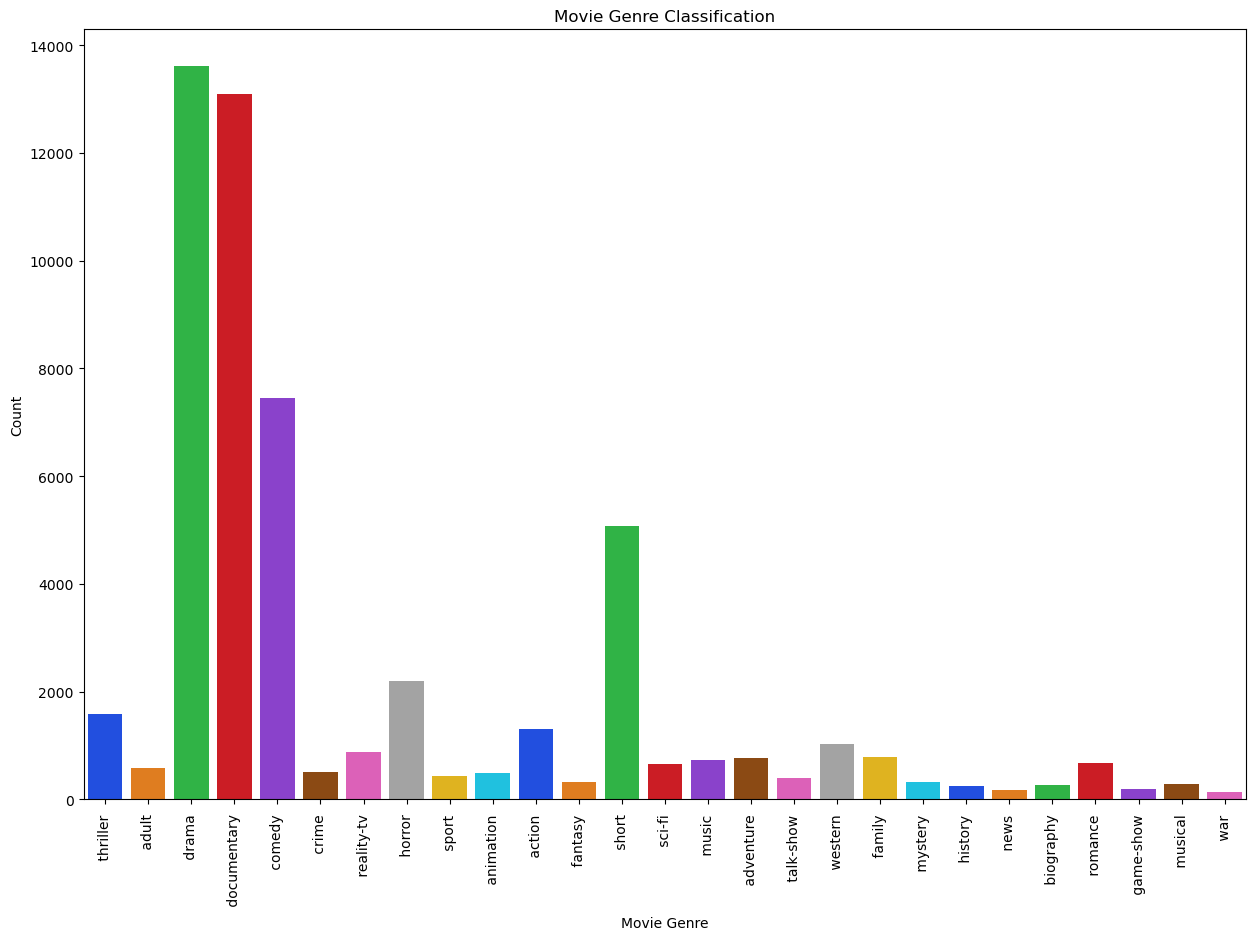

In [12]:
# Visualizing the training data
plt.figure(figsize=(15,10))
sns.countplot(x='Genre', data=df1, palette='bright')
plt.title("Movie Genre Classification")
plt.xlabel("Movie Genre")
plt.ylabel("Count")
plt.tick_params(axis='x', labelrotation=90) # preventing x axis labels from overlapping with each other
plt.show()


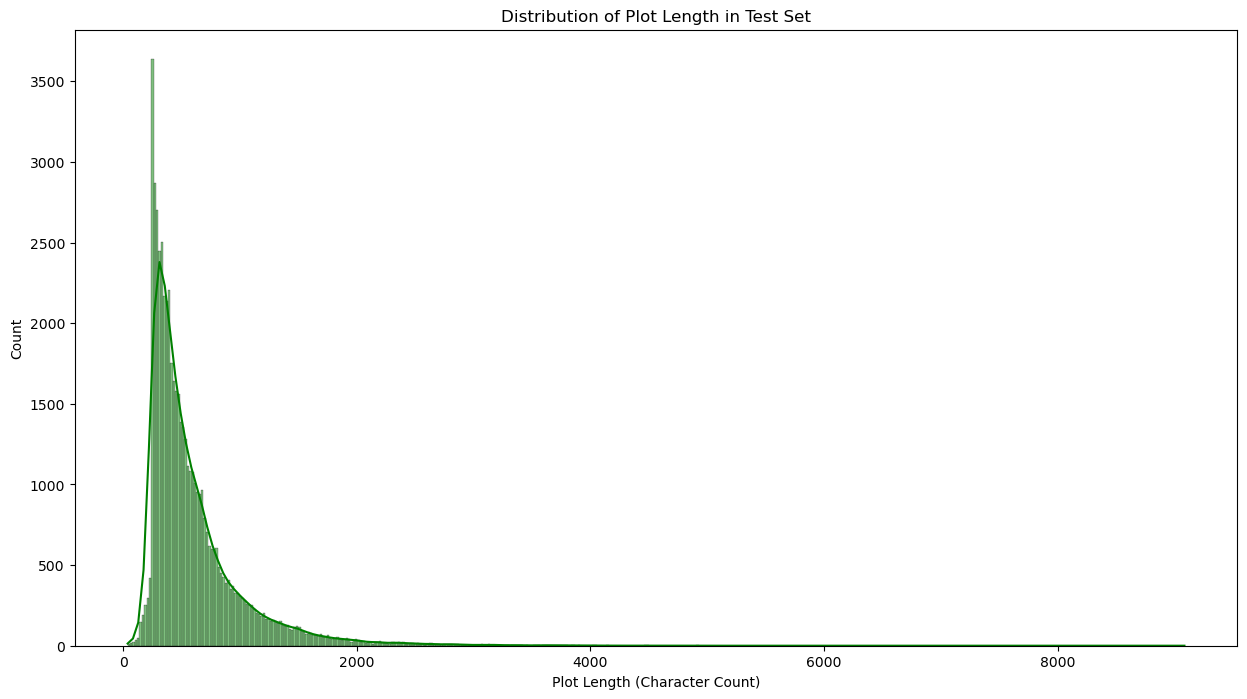

In [13]:
# Visualizing the testing data 
df2['Plot Length'] = df2['Plot'].apply(lambda x: len(str(x)))
plt.figure(figsize=(15, 8))
sns.histplot(df2['Plot Length'], kde=True, color='green')
plt.title("Distribution of Plot Length in Test Set")
plt.xlabel("Plot Length (Character Count)")
plt.ylabel("Count")
plt.show()

In [14]:
# Initialize TfidfVectorizer for text preprocessing
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Apply the vectorizer to the 'Plot' column in the training dataset
X_train = tfidf_vectorizer.fit_transform(df1['Plot'])

# Encode the target variable 'Genre' using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df1['Genre'])

# Apply the vectorizer to the 'Plot' column in the testing dataset
X_test = tfidf_vectorizer.transform(df2['Plot'])


In [15]:
# Splitting the training set into training and validation subsets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_split, y_train_split)

# Making predictions with logistic regression
y_pred_logreg = logreg_model.predict(X_val_split)

# Evaluating the logistic regression model
logreg_accuracy = accuracy_score(y_val_split, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_val_split, y_pred_logreg, target_names=label_encoder.classes_))

Logistic Regression Accuracy: 0.5830

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

      action        0.47      0.28      0.35       259
       adult        0.62      0.23      0.33       115
   adventure        0.53      0.12      0.19       153
   animation        0.50      0.04      0.07       105
   biography        0.00      0.00      0.00        43
      comedy        0.52      0.59      0.56      1479
       crime        0.31      0.04      0.08       115
 documentary        0.66      0.85      0.74      2595
       drama        0.54      0.77      0.64      2727
      family        0.39      0.08      0.13       141
     fantasy        0.75      0.05      0.10        59
   game-show        0.88      0.49      0.63        47
     history        0.00      0.00      0.00        50
      horror        0.73      0.61      0.66       494
       music        0.62      0.37      0.47       158
     musical        0.00      0.00

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


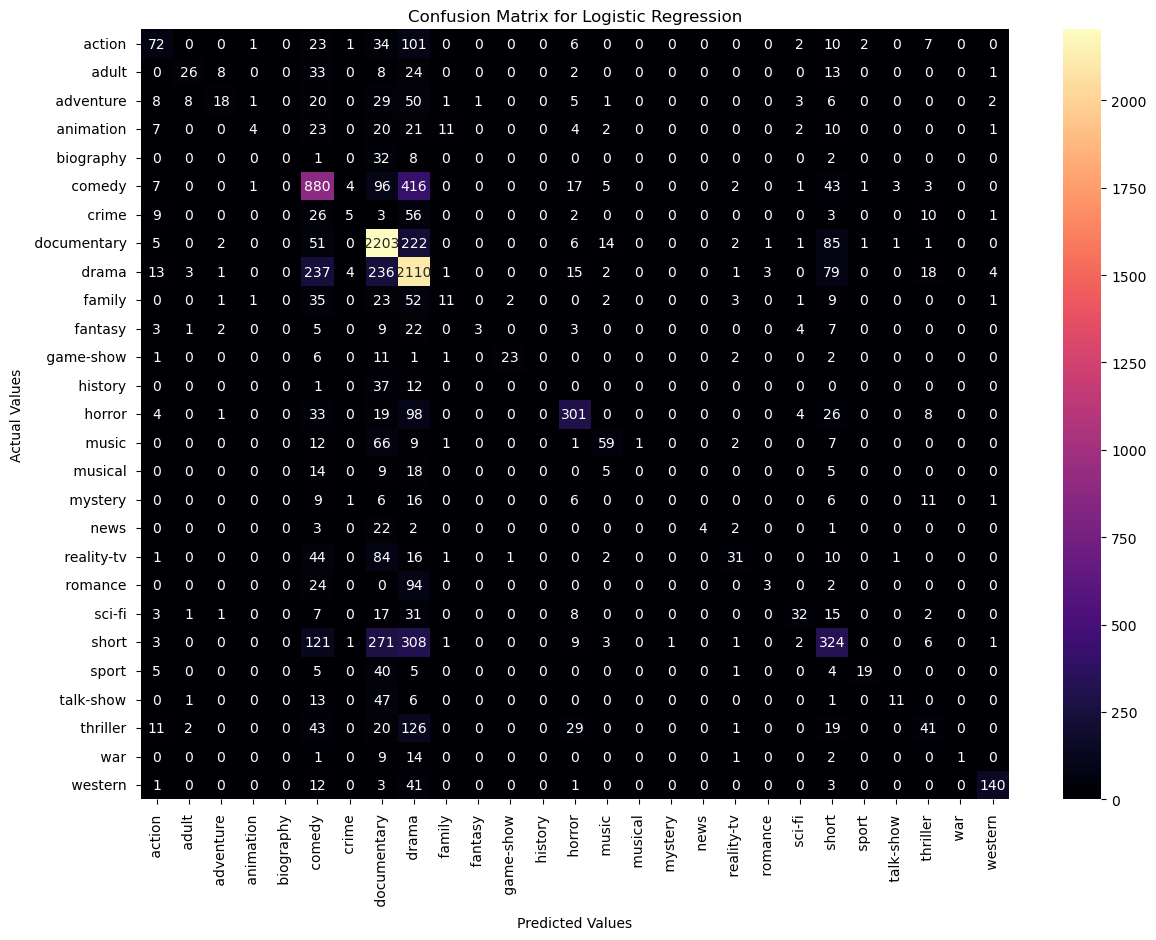

In [16]:
# Plotting the confusion matrix for logistic regression model
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix(y_val_split, y_pred_logreg), annot=True, fmt="d", cmap="magma", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show() 

In [17]:
# Naive Bayes Model Training
nb_model = MultinomialNB()
nb_model.fit(X_train_split, y_train_split)

# Making predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_val_split)

In [18]:
# Evaluating Naive Bayes Model
nb_accuracy = accuracy_score(y_val_split, y_pred_nb)
print(f"\nNaive Bayes Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report for Naive Bayes:")
print(classification_report(y_val_split, y_pred_nb, target_names=label_encoder.classes_))


Naive Bayes Accuracy: 0.5178

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

      action        0.61      0.08      0.15       259
       adult        0.62      0.04      0.08       115
   adventure        0.67      0.04      0.07       153
   animation        0.00      0.00      0.00       105
   biography        0.00      0.00      0.00        43
      comedy        0.51      0.43      0.47      1479
       crime        0.00      0.00      0.00       115
 documentary        0.56      0.87      0.68      2595
       drama        0.46      0.83      0.59      2727
      family        0.00      0.00      0.00       141
     fantasy        0.00      0.00      0.00        59
   game-show        1.00      0.17      0.29        47
     history        0.00      0.00      0.00        50
      horror        0.82      0.37      0.51       494
       music        0.93      0.09      0.16       158
     musical        0.00      0.00      0.00     

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


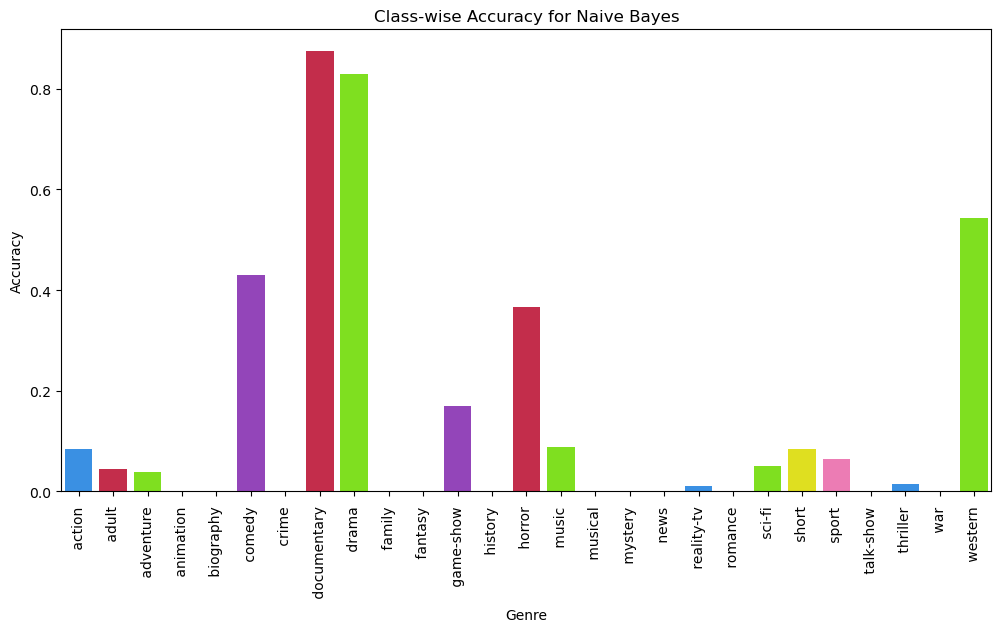

In [19]:
# Calculating the class-wise accuracy in the Naive Bayes model
class_accuracy = confusion_matrix(y_val_split, y_pred_nb).diagonal() / confusion_matrix(y_val_split, y_pred_nb).sum(axis=1)

# Plotting class-wise accuracy for Naive Bayes
plt.figure(figsize=(12, 6))
custom_palette = ['dodgerblue', 'crimson', 'chartreuse', 'yellow', 'hotpink', 'darkorchid']
sns.barplot(x=label_encoder.classes_, y=class_accuracy, palette=custom_palette)
plt.title('Class-wise Accuracy for Naive Bayes')
plt.xlabel('Genre')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()


In [20]:
# Final model evaluation on Logistic Regression test set
y_test_pred_logreg = logreg_model.predict(X_test)
y_test_pred_logreg = label_encoder.inverse_transform(y_test_pred_logreg)

# Saving the predicted genres
df2['Predicted Genre (Logistic Regression)'] = y_test_pred_logreg

# Displaying the first 5 rows of predictions on the test set
df2[['Movie Name', 'Predicted Genre (Logistic Regression)']].head()

,Movie Name,Predicted Genre (Logistic Regression)
0,La guerra de papá (1977),drama
1,Off the Beaten Track (2010),documentary
2,Meu Amigo Hindu (2015),drama
3,Er nu zhai (1955),drama
4,Riddle Room (2016),drama


In [21]:
# Final model evaluation on the Naive Bayes test set
y_test_pred_nb = nb_model.predict(X_test)
y_test_pred_nb = label_encoder.inverse_transform(y_test_pred_nb)

# Saving the predicted genres
df2['Predicted Genre (Naive Bayes)'] = y_test_pred_nb

# Displaying the first 5 rows of predictions on the test set
df2[['Movie Name', 'Predicted Genre (Naive Bayes)']].head()

,Movie Name,Predicted Genre (Naive Bayes)
0,La guerra de papá (1977),drama
1,Off the Beaten Track (2010),documentary
2,Meu Amigo Hindu (2015),drama
3,Er nu zhai (1955),drama
4,Riddle Room (2016),drama


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Building SVM (Support Vector Machine) model
svm_model = SVC(kernel='linear') # Linear SVM
svm_model.fit(X_train_split, y_train_split)

SVC(kernel='linear')

In [24]:
# Making predictions on the test set
y_pred_svm = svm_model.predict(X_val_split)

In [25]:
# Evaluating the SVM Model
svm_accuracy = accuracy_score(y_val_split, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report for SVM:")
print(classification_report(y_val_split, y_pred_svm, target_names=label_encoder.classes_))

SVM Accuracy: 0.5845

Classification Report for SVM:
               precision    recall  f1-score   support

      action        0.39      0.33      0.36       259
       adult        0.54      0.34      0.42       115
   adventure        0.50      0.19      0.27       153
   animation        0.50      0.12      0.20       105
   biography        0.00      0.00      0.00        43
      comedy        0.51      0.59      0.55      1479
       crime        0.44      0.06      0.11       115
 documentary        0.67      0.84      0.75      2595
       drama        0.55      0.75      0.64      2727
      family        0.43      0.11      0.18       141
     fantasy        0.50      0.07      0.12        59
   game-show        0.88      0.62      0.73        47
     history        0.00      0.00      0.00        50
      horror        0.70      0.62      0.66       494
       music        0.56      0.42      0.48       158
     musical        0.67      0.12      0.20        51
     myster

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


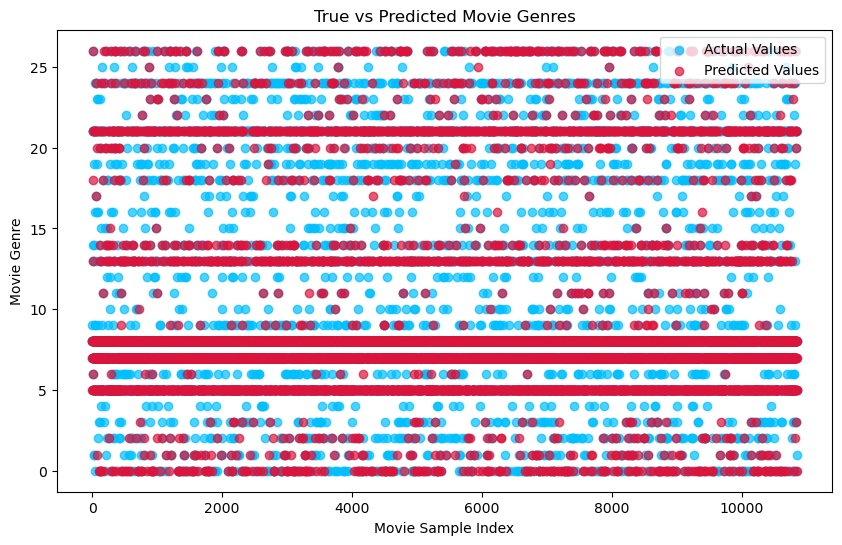

In [27]:
# Prediction on validation data
y_pred = svm_model.predict(X_val_split)

# Plotting a scatter plot of true vs predicted labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val_split)), y_val_split, label='Actual Values', alpha=0.7, color='deepskyblue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values', alpha=0.7, color='crimson')
plt.title("True vs Predicted Movie Genres")
plt.xlabel("Movie Sample Index")
plt.ylabel("Movie Genre")
plt.legend()
plt.show()
